In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# DATA LOADING

In [3]:
df = pd.read_parquet('sample_data.pq')
ids = df['ID'].unique()
df

TIME    ID    V_NORM
10465 2023-03-19 00:00:00  1051  1.072174
10467 2023-03-19 00:00:00  1062  1.032174
10483 2023-03-19 00:00:00  1077  1.019130
1827  2023-03-19 00:00:00  1083  1.057826
10524 2023-03-19 00:05:00  1051  1.073043
...                   ...   ...       ...
4297  2023-03-19 23:50:00  1083  1.056957
19115 2023-03-19 23:55:00  1051  1.073478
19083 2023-03-19 23:55:00  1062  1.033478
19007 2023-03-19 23:55:00  1077  1.017826
4309  2023-03-19 23:55:00  1083  1.058261

[1152 rows x 3 columns]

In [4]:
def plot_df(df, mode='lines+markers'):   
    fig = go.Figure(layout={'height': 1000})

    for idx in df['ID'].unique():
        filtered_df = df[df["ID"] == idx]

        fig.add_trace(go.Scatter(x=filtered_df["TIME"], y=filtered_df["V_NORM"], mode=mode, name=f"ID: {idx}"))
    
    fig.show()
    
    
plot_df(df)



---


# STATISTICAL MEASURES

### Mean
The *mean* is the average of all numbers and is sometimes called the arithmetic mean. It is calculated by summing all the numbers and then dividing by the count of numbers.
The formula for the mean $\mu$ of a set of numbers $x_1, x_2, ..., x_n$ is:

$$ \mu = \frac{1}{n}\sum_{i=1}^{n}x_i $$

### Median
The *median* is the middle value in a list of numbers. To find the median, you need to arrange the numbers in order and then find the middle number. If there is an even number of observations, the median is the average of the two middle numbers.
There is no simple formula for the median; it is found by ordering the set of values.

### Mode
The *mode* is the number that appears most frequently in a data set. A set of numbers may have one mode, more than one mode, or no mode at all.


# HISTOGRAM & KERNEL DISTRIBUTION ESTIMATION (KDE)

### Histogram
A *histogram* is a graphical representation of the distribution of numerical data. Histograms are constructed by binning the range of values and counting the number of observations that fall into each bin. The bins are usually specified as consecutive, non-overlapping intervals of a variable.

### Kernel Density Estimation (KDE)

<div style="float: left;">
  <img src="kde_explanation.png" width="1000" />
</div>
<div style="clear: both;"></div>

*KDE* is a non-parametric way to estimate the probability density function of a random variable. KDE is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample. It uses a mixture of kernels (usually Gaussian) to give a smooth estimate of the data distribution. The formula for KDE is:

$$ \hat{f}_h(x) = \frac{1}{nh}\sum_{i=1}^{n} K\left(\frac{x - x_i}{h}\right) $$

Where:
- $\hat{f}_h(x)$ is the estimated density function
- $n$ is the number of data points
- $h$ is the bandwidth
- $K$ is the kernel function
- $x_i$ are the data points


In [5]:
from scipy import stats
from scipy.stats import gaussian_kde
from scipy.signal import find_peaks

1051 =============================================================================
Min: 1.0643478260869565
Max: 1.0930434782608696
Mean: 1.075895229468599
Median: 1.075217391304348
Mode: 1.076086956521739


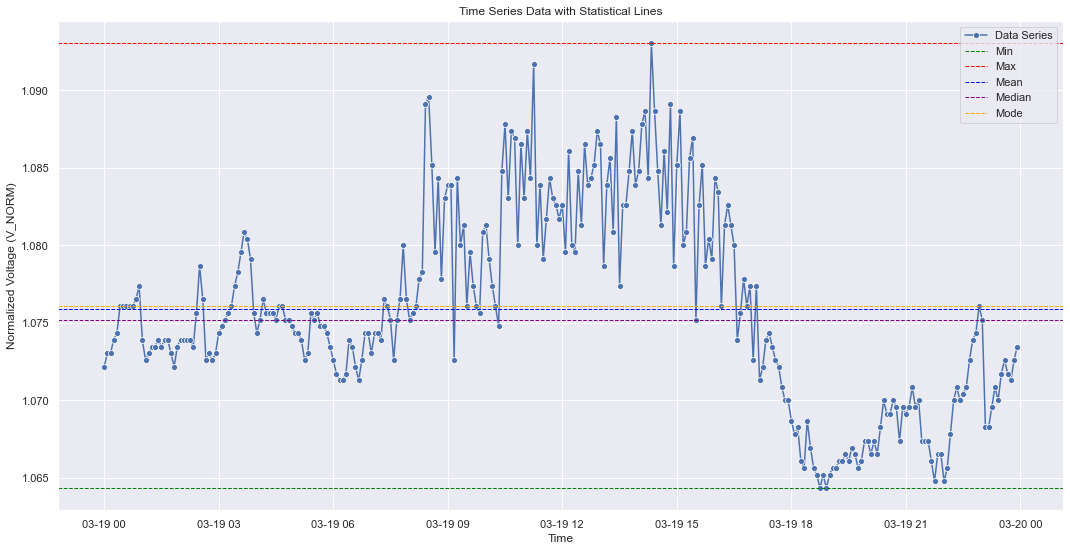

Density Peaks: [1.07434391]
Density Throughs: []


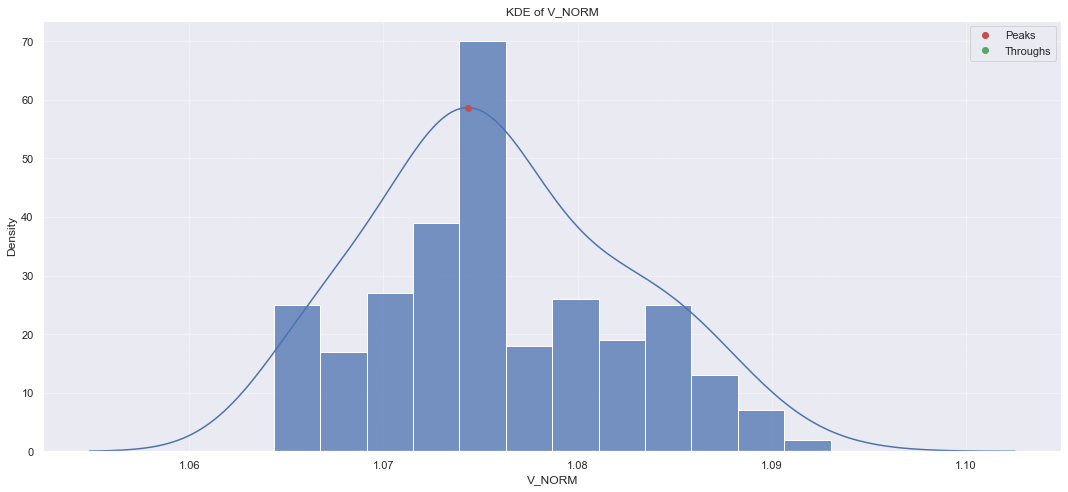

1062 =============================================================================
Min: 0.9678260869565217
Max: 1.0408695652173914
Mean: 1.022019927536232
Median: 1.0291304347826087
Mode: 1.03


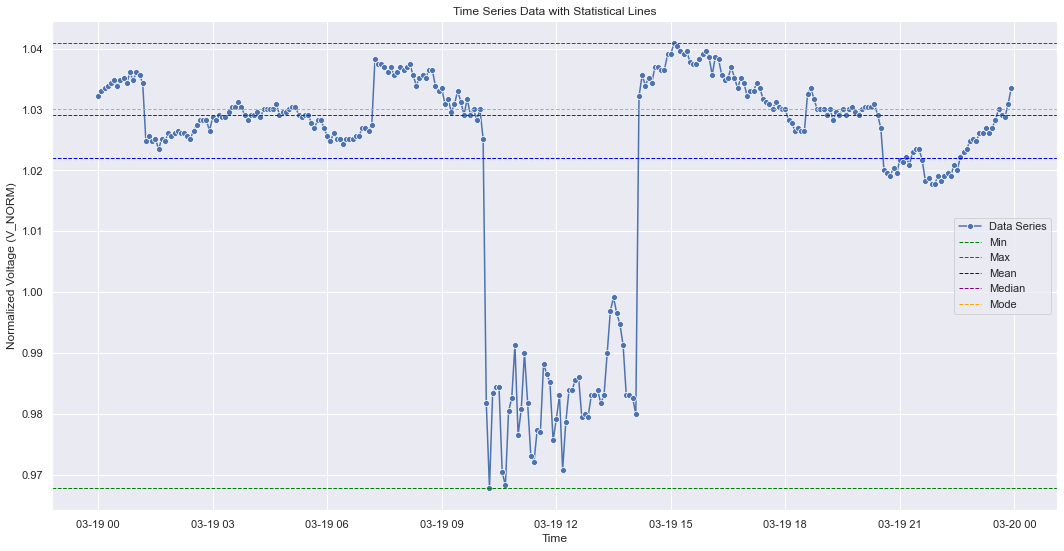

Density Peaks: [0.98237629 1.03004831]
Density Throughs: [1.00109414]


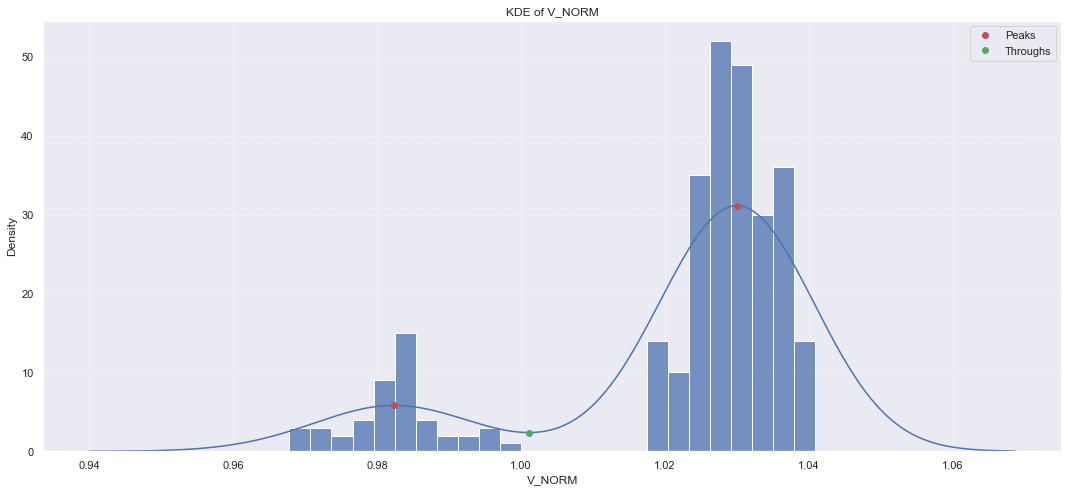

1077 =============================================================================
Min: 0.9195652173913044
Max: 1.0234782608695652
Mean: 1.0019957729468598
Median: 1.0139130434782608
Mode: 1.0165217391304349


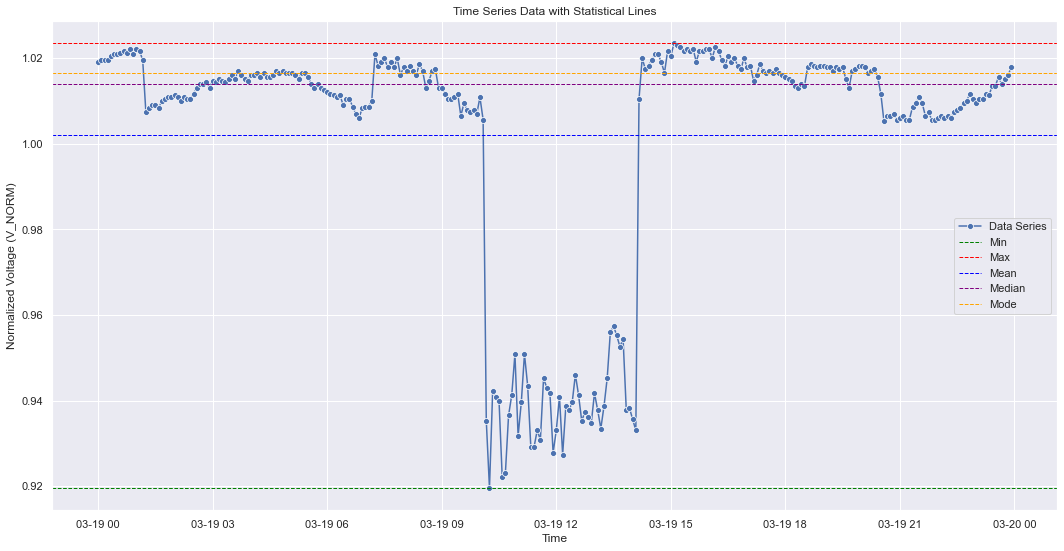

Density Peaks: [0.93849632 1.01474083]
Density Throughs: [0.9712617]


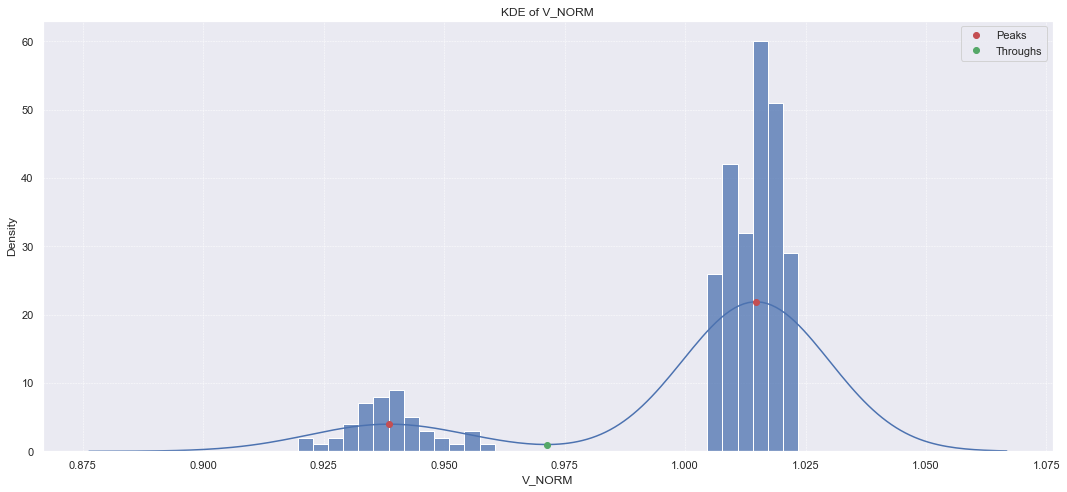

1083 =============================================================================
Min: 1.0434782608695652
Max: 1.066521739130435
Mean: 1.0563420893719806
Median: 1.057391304347826
Mode: 1.0582608695652174


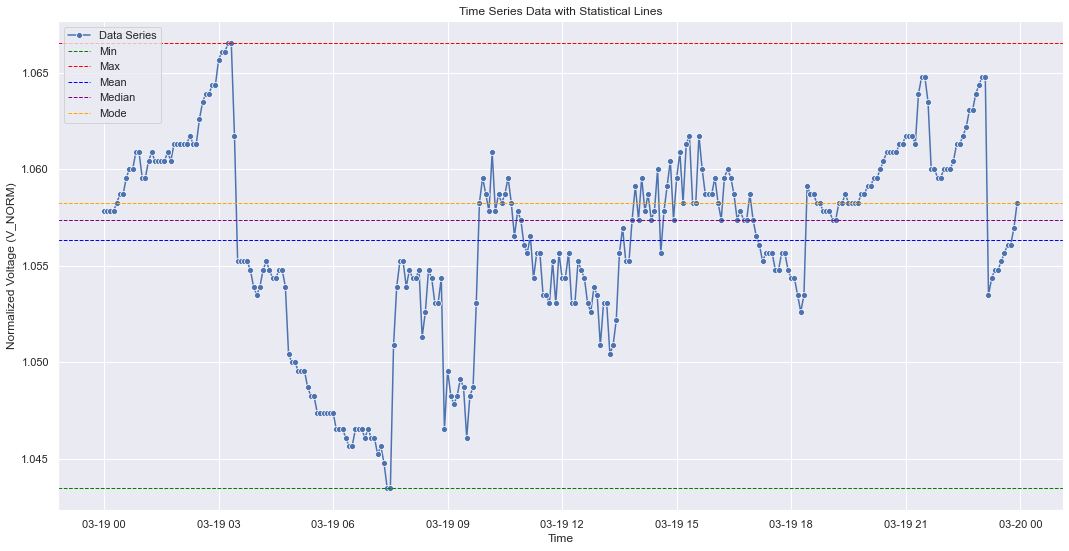

Density Peaks: [1.05798712]
Density Throughs: []


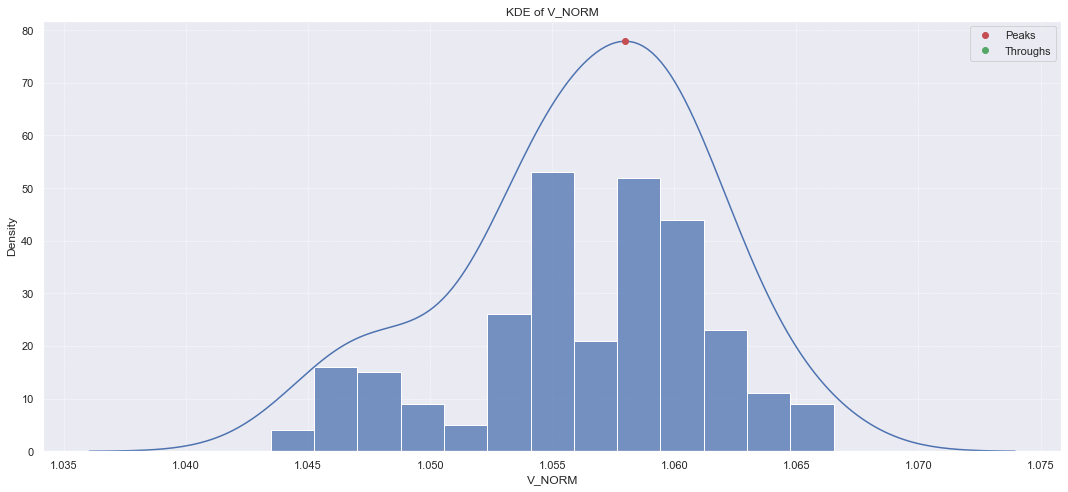

In [18]:
def plot_series_hist(idx, df, mode='lines+markers', bw_method=0.5):
    density = gaussian_kde(df['V_NORM'], bw_method=bw_method)
    x_vals = np.linspace(min(df['V_NORM']), max(df['V_NORM']), 1000)
    y_vals = density(x_vals)
    
    kde_peaks, _ = find_peaks(y_vals, distance=10)
    peak_values = x_vals[kde_peaks]
    print('Density Peaks:', peak_values)
    
    kde_throughs, _ = find_peaks(-y_vals, distance=10)
    through_values = x_vals[kde_throughs]
    print('Density Throughs:', through_values)
    
    sns.set(rc={'figure.figsize':(15,7)})
    sns.kdeplot(df['V_NORM'], bw_method=bw_method)
    sns.histplot(df['V_NORM'])
    
    plt.plot(x_vals[kde_peaks], y_vals[kde_peaks], "ro", label="Peaks")
    plt.plot(x_vals[kde_throughs], y_vals[kde_throughs], "go", label="Throughs")
    plt.title(f"KDE of {'V_NORM'}")
    plt.xlabel('V_NORM')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()
    

def plot_time_series_with_stats(df):
    # Calculate statistics
    min_val = df['V_NORM'].min()
    max_val = df['V_NORM'].max()
    mean_val = df['V_NORM'].mean()
    median_val = df['V_NORM'].median()
    mode_val = df['V_NORM'].mode()[0]

    # Set the aesthetic style of the plots
    sns.set(rc={'figure.figsize':(18,9)})

    # Plot the time series data
    sns.lineplot(x='TIME', y='V_NORM', data=df, marker='o', linestyle='-', label='Data Series')

    # Add horizontal lines for statistics
    plt.axhline(min_val, color='green', linestyle='dashed', linewidth=1, label='Min')
    plt.axhline(max_val, color='red', linestyle='dashed', linewidth=1, label='Max')
    plt.axhline(mean_val, color='blue', linestyle='dashed', linewidth=1, label='Mean')
    plt.axhline(median_val, color='purple', linestyle='dashed', linewidth=1, label='Median')
    plt.axhline(mode_val, color='orange', linestyle='dashed', linewidth=1, label='Mode')

    # Add labels and title
    plt.xlabel('Time')
    plt.ylabel('Normalized Voltage (V_NORM)')
    plt.title('Time Series Data with Statistical Lines')
    plt.legend()
    plt.show()
    
    
for idx in ids:
    df_id = df[df['ID'] == idx]
    
    print(idx, "=============================================================================")
    print('Min:', df_id['V_NORM'].min())
    print('Max:', df_id['V_NORM'].max())
    print('Mean:', df_id['V_NORM'].mean())
    print('Median:', df_id['V_NORM'].median())
    print('Mode:', df_id['V_NORM'].mode()[0])
    
    plot_time_series_with_stats(df_id)
    plot_series_hist(idx, df_id)

# STANDARD DEVIATION & Z SCORE

## Standard Deviation

The standard deviation is a statistic that measures the dispersion of a dataset relative to its mean and is calculated as the square root of the variance. It is the most widely used measure of variability. The formula for the standard deviation (\(\sigma\)) is:

$$ \sigma = \sqrt{\frac{1}{n-1}\sum_{i=1}^{n} (x_i - \mu)^2} $$

Where:
- $n$ is the number of observations
- $x_i$ is each individual observation
- $\mu$ is the mean of the dataset
- $(x_i - \mu)^2$ is the squared difference from the mean

<div style="float: left; clear: left;">
  <img src="std_dev_percentages.jpg" width="600" />
</div>
<div style="clear: both;"></div>

## Z-Score

The Z-score, also known as a standard score, indicates how many standard deviations an element is from the mean. It is a measure of how unusual or typical a data point is within a dataset. The formula for the Z-score (Z) is:

$$ Z = \frac{(x_i - \mu)}{\sigma} $$

Where:
- $x_i$ is each individual observation
- $\mu$ is the mean of the dataset
- $\sigma$ is the standard deviation of the dataset

The Z-score standardizes the entire dataset, allowing for the comparison of scores from different datasets.

1051 =============================================================================


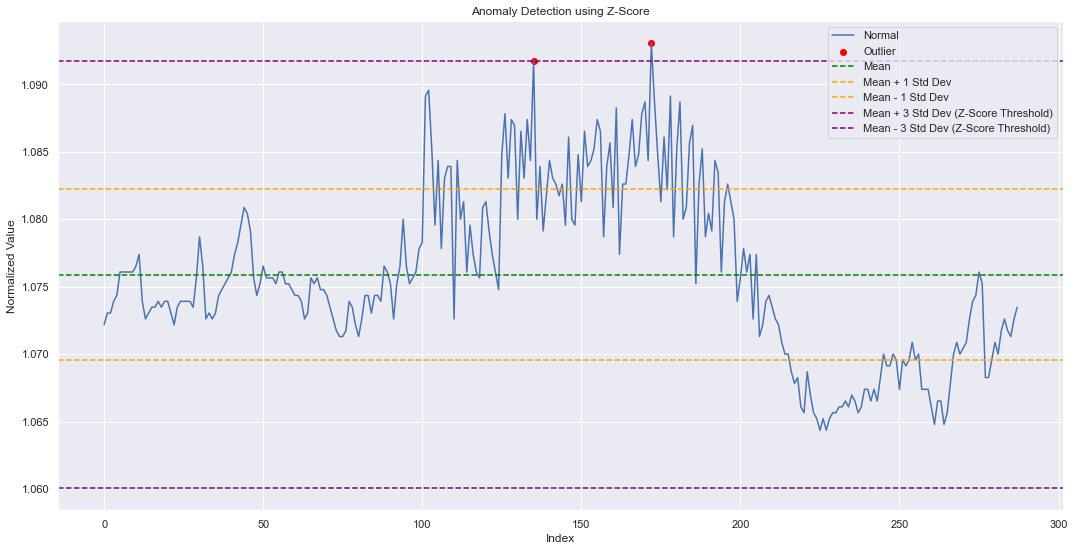

1062 =============================================================================


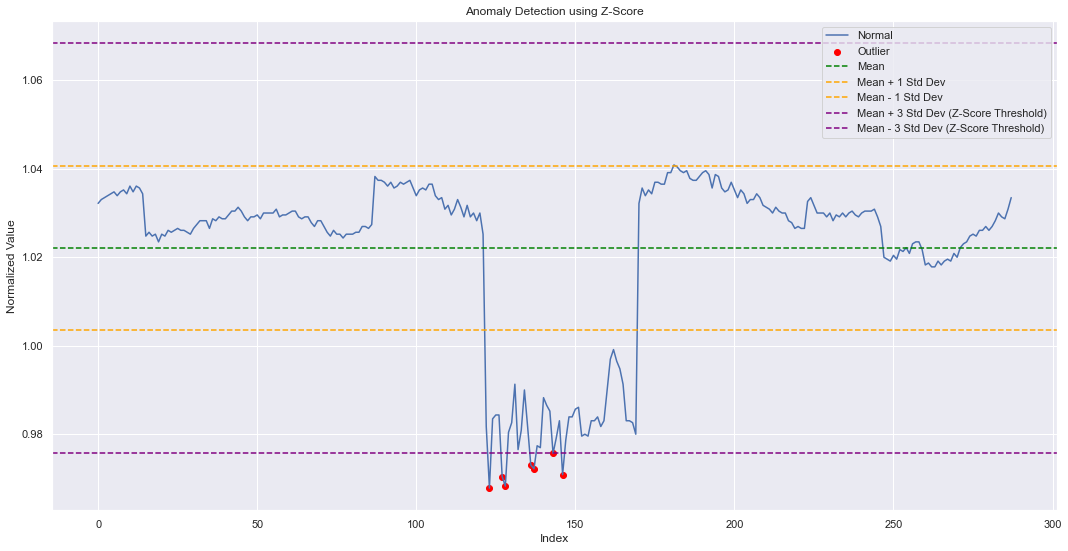

1077 =============================================================================


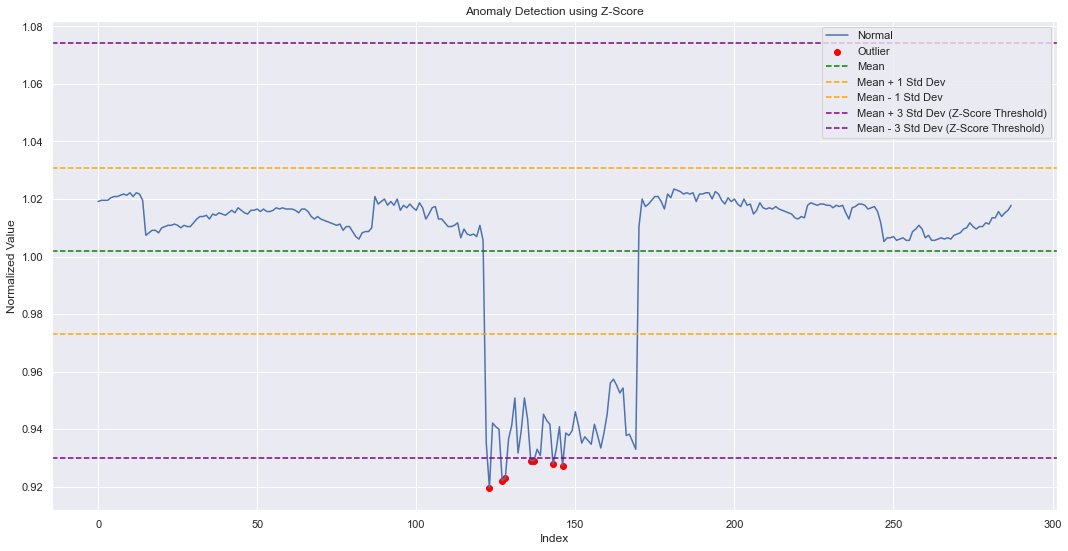

1083 =============================================================================


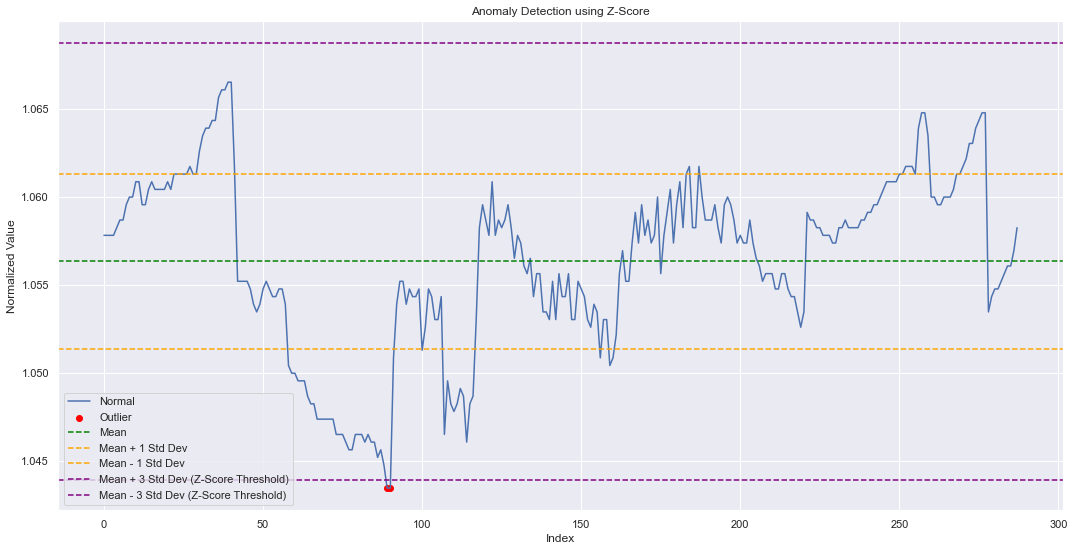

In [19]:
for idx in ids:
    print(idx, "=============================================================================")
    df_id = df[df['ID'] == idx].copy()
    df_id.reset_index(drop=True, inplace=True)
    
    # Calculate the Z-score for the 'V_NORM' column
    df_id['z_score'] = stats.zscore(df_id['V_NORM'])

    # Identify outliers
    threshold = 2.5
    df_id['outlier'] = np.abs(df_id['z_score']) > threshold

    # Calculate mean and standard deviation of the 'V_NORM' values
    mean_value = df_id['V_NORM'].mean()
    std_dev = df_id['V_NORM'].std()
    
    # Plotting with mean and standard deviation lines
    plt.figure(figsize=(18, 9))
    plt.plot(df_id['V_NORM'], label='Normal')
    plt.scatter(df_id.index[df_id['outlier']], df_id['V_NORM'][df_id['outlier']], color='red', label='Outlier')

    # Mean line
    plt.axhline(mean_value, color='green', linestyle='--', label='Mean')

    # Standard deviation lines
    plt.axhline(mean_value + std_dev, color='orange', linestyle='--', label='Mean + 1 Std Dev')
    plt.axhline(mean_value - std_dev, color='orange', linestyle='--', label='Mean - 1 Std Dev')

    # Z-score threshold lines (mean ± (Z-score threshold * standard deviation))
    plt.axhline(mean_value + (threshold * std_dev), color='purple', linestyle='--', label='Mean + 3 Std Dev (Z-Score Threshold)')
    plt.axhline(mean_value - (threshold * std_dev), color='purple', linestyle='--', label='Mean - 3 Std Dev (Z-Score Threshold)')

    plt.xlabel('Index')
    plt.ylabel('Normalized Value')
    plt.title('Anomaly Detection using Z-Score')
    plt.legend()
    plt.show()



# MEAN ABSOLUTE DEVIATION (MAD) & ROBUST Z SCORE


https://www.youtube.com/watch?v=qy41dXGbAxY

## Mean Absolute Deviation (MAD)

The Mean Absolute Deviation (MAD) is a measure of variability that represents the average absolute difference between each data point and the mean of the dataset. It is a robust measure of central tendency, less sensitive to outliers compared to the standard deviation. The formula for MAD is:

$$ \text{MAD} = \frac{1}{n}\sum_{i=1}^{n} |x_i - \mu| $$

Where:
- $n$ is the number of observations
- $x_i$ is each individual observation
- $\mu$ is the mean of the dataset
- $|x_i - \mu|$ is the absolute difference from the mean

## Robust Z-Score

The Robust Z-Score, also known as the Modified Z-Score, is an alternative to the standard Z-Score for identifying outliers. It is particularly useful when the data contains outliers or is not normally distributed. The Robust Z-Score is calculated using the median and the MAD, making it more robust to outliers. The formula for the Robust Z-Score is:

$$ \text{Robust Z-Score} = \frac{0.6745 \times (x_i - \text{Median})}{\text{MAD}} $$

Where:
- $x_i$ is each individual observation
- Median is the median of the dataset
- MAD is the mean absolute deviation
- The constant $0.6745$ ensures consistency with the standard Z-Score in case of a normal distribution.


1051 =============================================================================


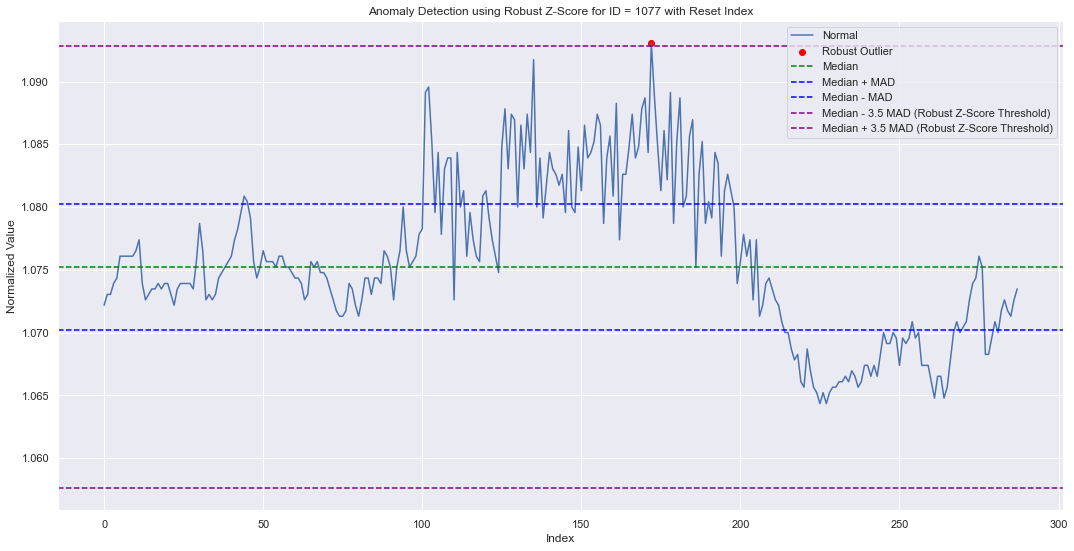

1062 =============================================================================


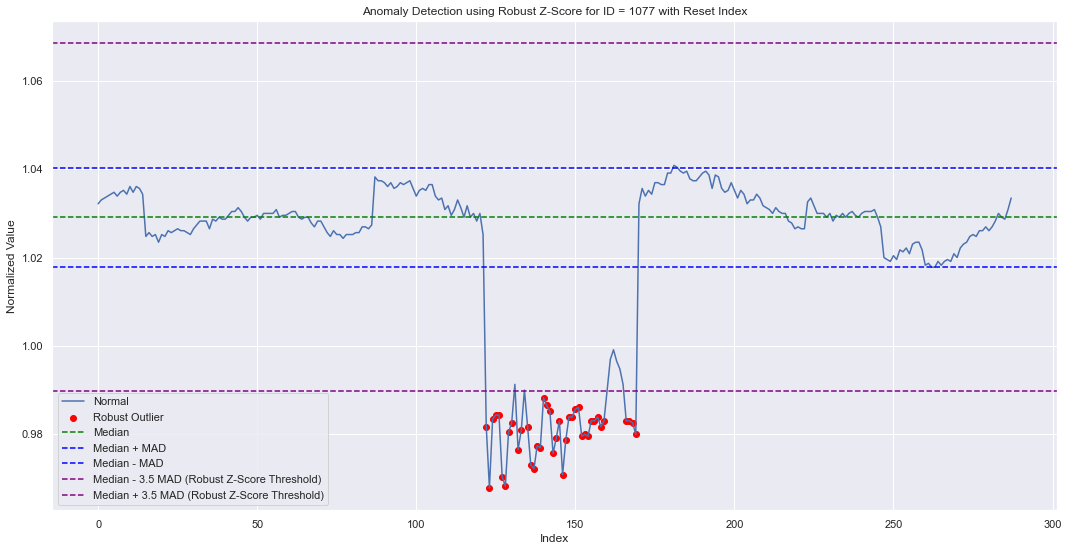

1077 =============================================================================


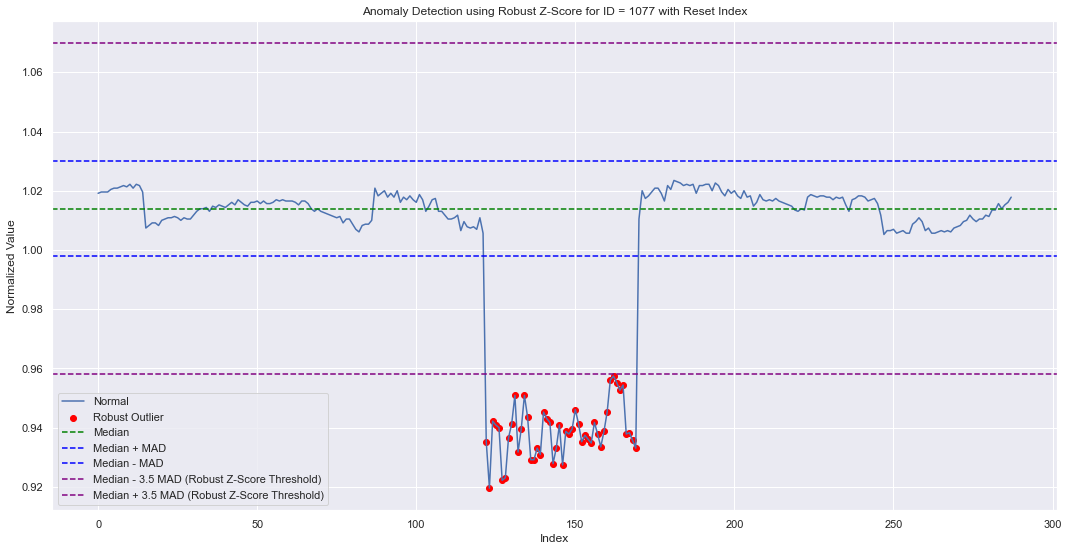

1083 =============================================================================


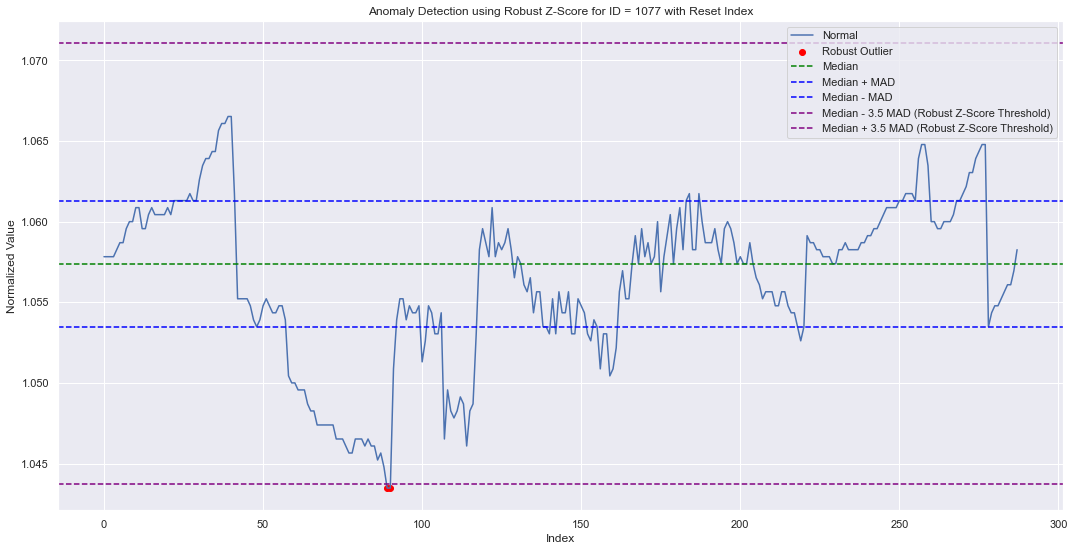

In [9]:
for idx in ids:
    print(idx, "=============================================================================")
    df_id = df[df['ID'] == idx].copy()
    df_id.reset_index(drop=True, inplace=True)

    # Calculate the MAD and median of the 'V_NORM' values for more robust measure
    mad = (df_id['V_NORM'] - df_id['V_NORM'].median()).abs().mean()
    median_value = df_id['V_NORM'].median()

    # Lower and upper bounds for robust outliers
    robust_threshold = 3.5
    lower_bound = median_value - (robust_threshold * mad)
    upper_bound = median_value + (robust_threshold * mad)

    # Identify robust outliers based on the bounds
    df_id['robust_outlier'] = (df_id['V_NORM'] < lower_bound) | (df_id['V_NORM'] > upper_bound)

    # Plotting with median, MAD, and robust Z-score lines, including robust outliers
    plt.figure(figsize=(18, 9))
    plt.plot(df_id['V_NORM'], label='Normal')
    plt.scatter(df_id.index[df_id['robust_outlier']], df_id['V_NORM'][df_id['robust_outlier']], color='red', label='Robust Outlier')

    # Median line
    plt.axhline(median_value, color='green', linestyle='--', label='Median')

    # MAD lines (median ± MAD)
    plt.axhline(median_value + mad, color='blue', linestyle='--', label='Median + MAD')
    plt.axhline(median_value - mad, color='blue', linestyle='--', label='Median - MAD')

    # Robust Z-score threshold lines
    plt.axhline(lower_bound, color='purple', linestyle='--', label='Median - 3.5 MAD (Robust Z-Score Threshold)')
    plt.axhline(upper_bound, color='purple', linestyle='--', label='Median + 3.5 MAD (Robust Z-Score Threshold)')

    plt.xlabel('Index')
    plt.ylabel('Normalized Value')
    plt.title('Anomaly Detection using Robust Z-Score for ID = 1077 with Reset Index')
    plt.legend()
    plt.show()

    # Return the number of robust outliers detected
    robust_outlier_count = df_id['robust_outlier'].sum()
    robust_outlier_count

# DBSCAN CLUSTERING ALGORITHM

- https://www.youtube.com/watch?v=Lh2pAkNNX1g
- https://www.youtube.com/watch?v=VO_uzCU_nKw

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular unsupervised machine learning algorithm used for clustering that groups together points that are closely packed together while marking points that lie alone in low-density regions as outliers. The main concept behind DBSCAN is that a cluster is a high-density area surrounded by a region of low density.

### Key Parameters of DBSCAN:

- **eps (ε):** The maximum distance between two samples for one to be considered as in the neighborhood of the other.
- **min_samples:** The number of samples in a neighborhood for a point to be considered as a core point.

### Algorithm Steps:

1. DBSCAN begins with an arbitrary starting data point that has not been visited.
2. The neighborhood of this point is retrieved, and if it contains sufficient number of points, a cluster is started.
3. All points within `eps` neighborhood are added to the cluster and their own neighborhoods are checked for density-connected points.
4. This process continues until the density-connected cluster is fully found.
5. A new unvisited point is retrieved and processed, leading to the discovery of further clusters or noise.

### Process:

<div style="float: left; clear: left;">
  <img src="dbscan_step_1.png" width="600" />
</div>
<div style="clear: both;"></div>

1. **Core Points:** If a point has at least `min_samples` points within `eps` radius, it's a core point.
<div style="float: left; clear: left;">
  <img src="dbscan_step_2.png" width="600" />
</div>
<div style="clear: both;"></div>

2. **Border Points:** If a point has fewer than `min_samples` points within `eps` radius but is in the neighborhood of a core point, it's a border point.
<div style="float: left; clear: left;">
  <img src="dbscan_step_3.png" width="600" />
</div>
<div style="clear: both;"></div>

3. **Noise Points:** If a point is neither a core point nor a border point, it's considered noise.

DBSCAN is favored for its simplicity and ability to find arbitrary shaped clusters and handle outliers effectively.

In [10]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

## DBSCAN Application

1051 =============================================================================


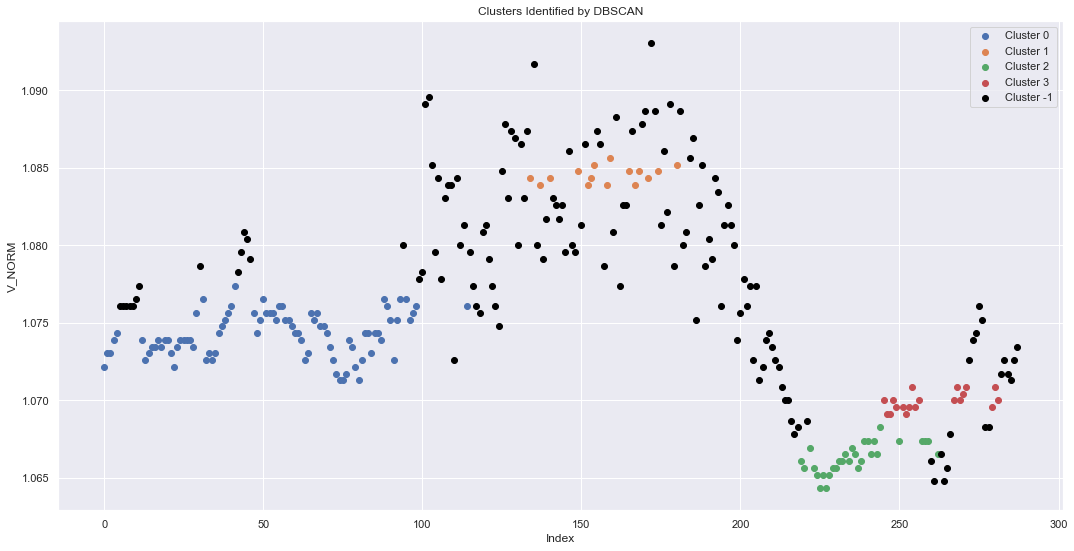

1062 =============================================================================


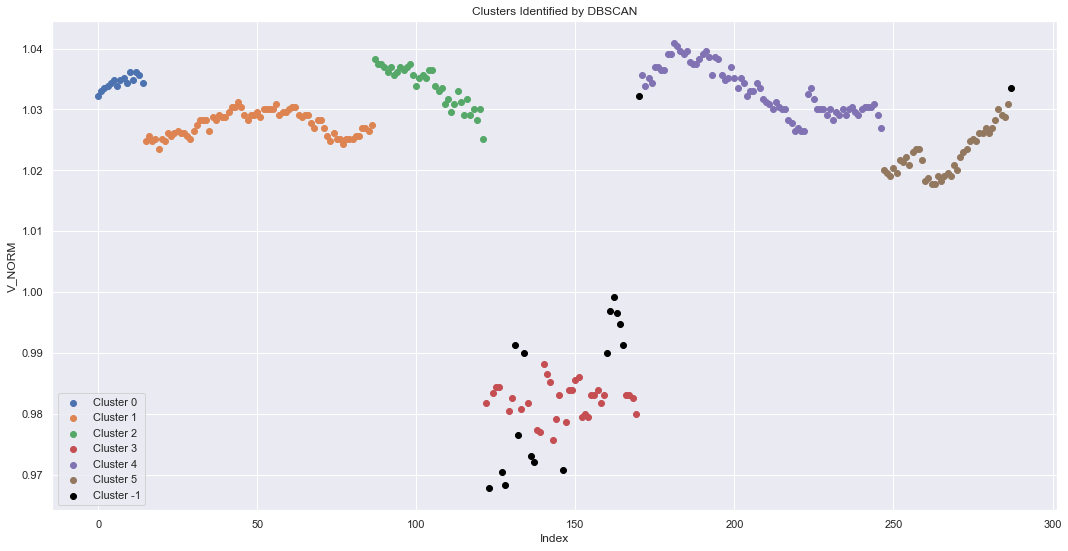

1077 =============================================================================


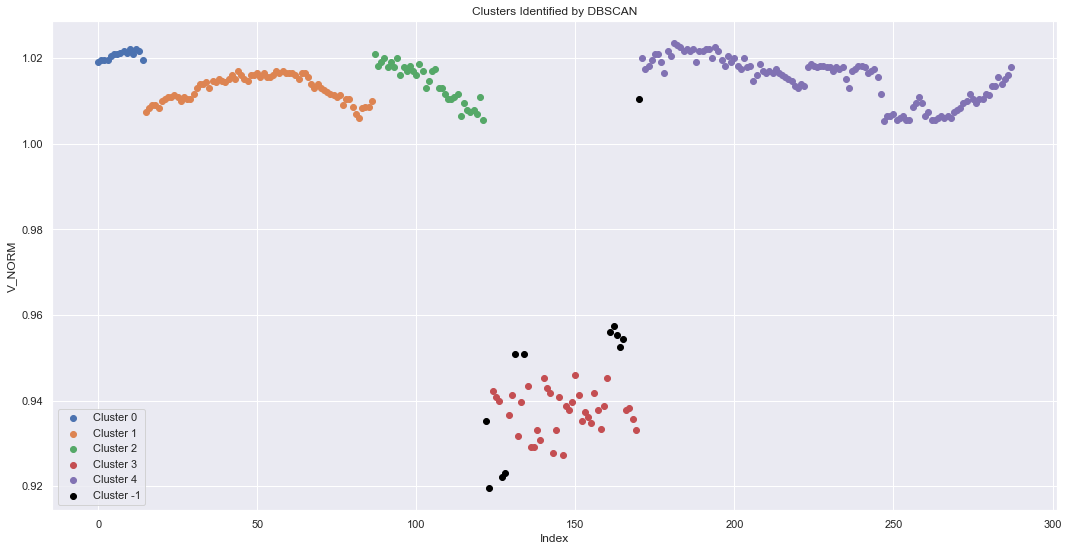

1083 =============================================================================


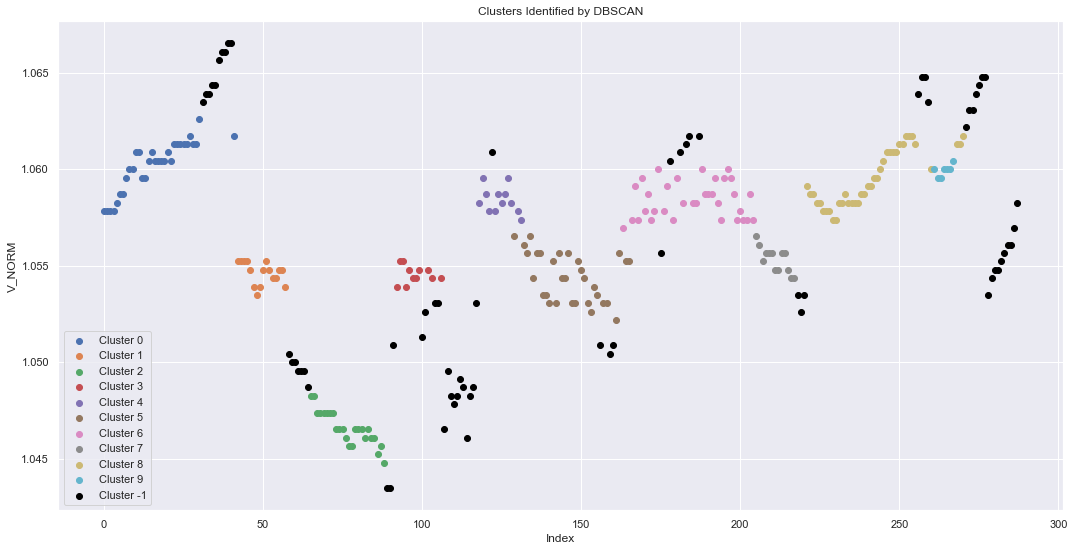

In [12]:
for idx in ids:
    print(idx, "=============================================================================")
    df_id = df[df['ID'] == idx].copy()
    df_id.reset_index(drop=True, inplace=True)

    # Creating a 2D space (using 'V_NORM' and DataFrame index)
    X = df_id[['V_NORM']].copy()
    X['Index'] = df_id.index
    X = StandardScaler().fit_transform(X)  # Standardizing the data

    # Apply DBSCAN
    dbscan = DBSCAN(eps=0.2, min_samples=10)  # Adjust eps and min_samples based on your data
    clusters = dbscan.fit_predict(X)

    # Plotting the clusters
    plt.figure(figsize=(18, 9))
    unique_clusters = set(clusters)
    for cluster in unique_clusters:
        # Select data points in the current cluster
        cluster_data = df_id[clusters == cluster]

        # Choose a color for each cluster
        color = 'black' if cluster == -1 else None  # Outliers in black

        plt.scatter(cluster_data.index, cluster_data['V_NORM'], c=color, label=f'Cluster {cluster}')

    plt.xlabel('Index')
    plt.ylabel('V_NORM')
    plt.title('Clusters Identified by DBSCAN')
    plt.legend()
    plt.show()

## Dimmensionality reduction

1051 =============================================================================


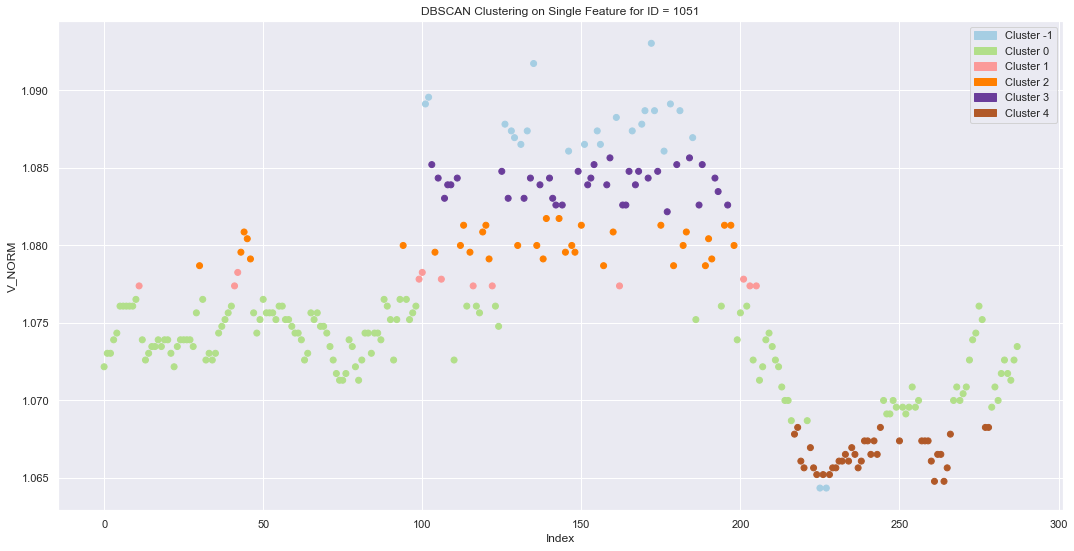

1062 =============================================================================


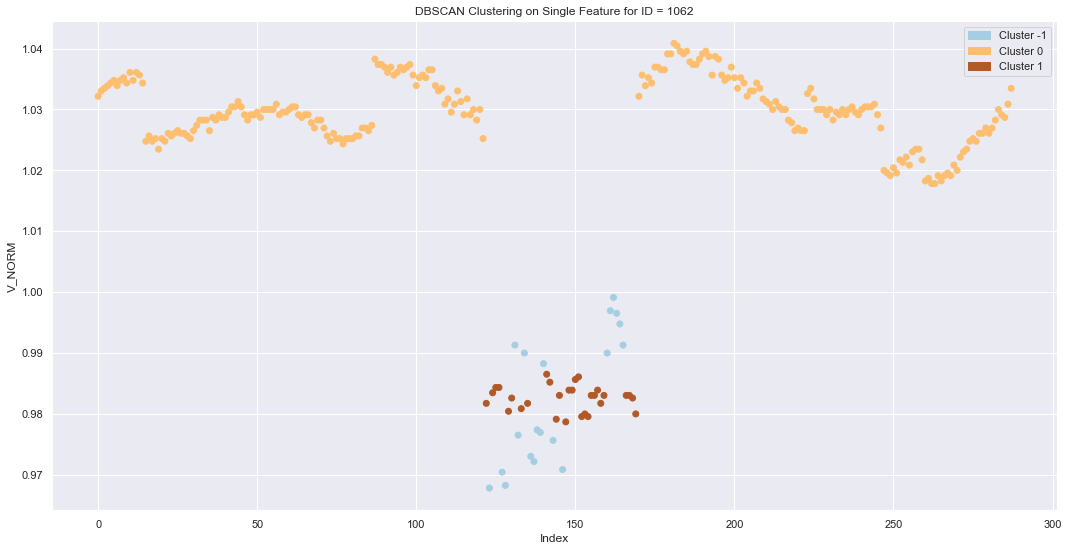

1077 =============================================================================


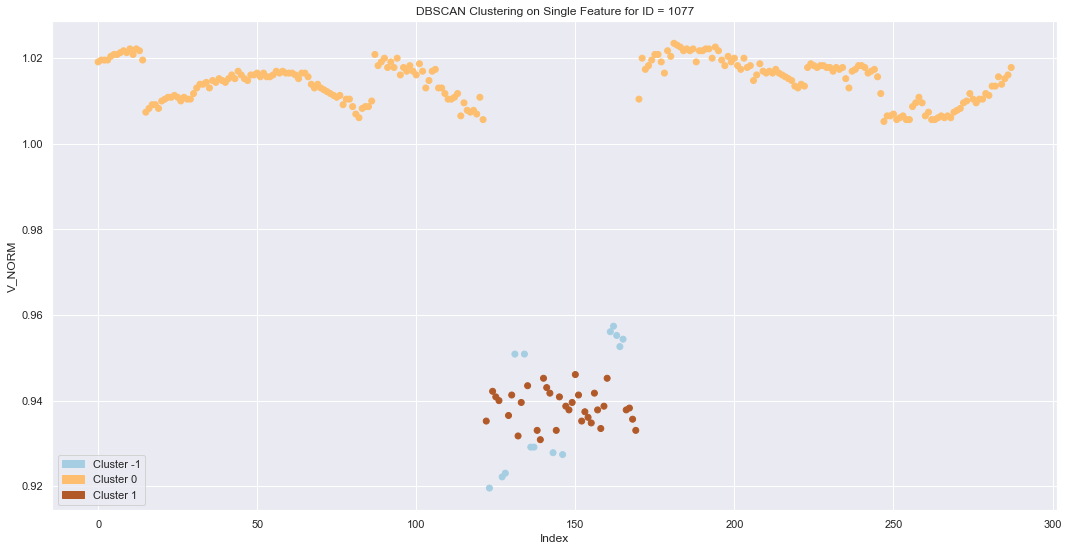

1083 =============================================================================


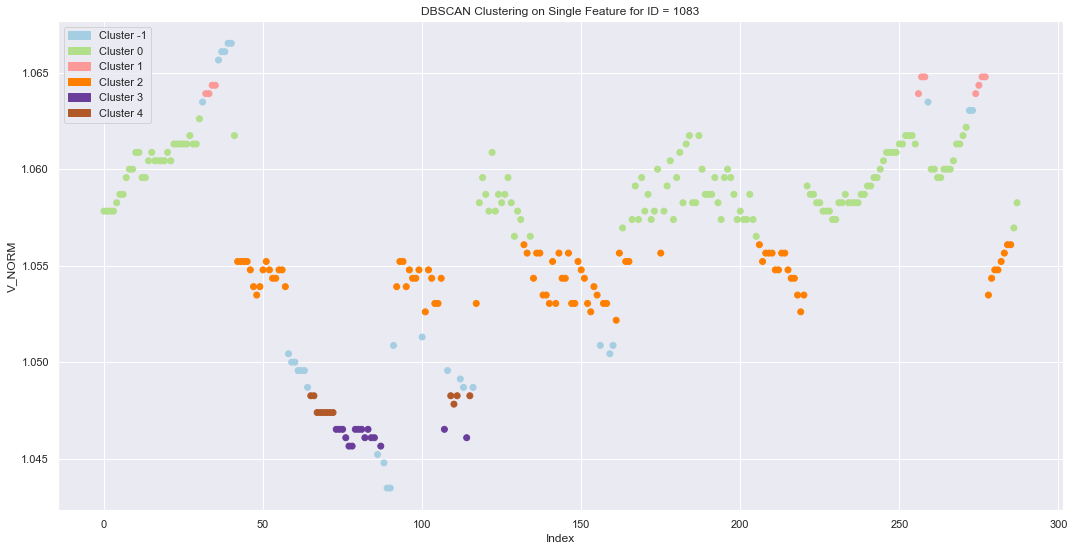

In [13]:
for idx in ids:
    print(idx, "=============================================================================")
    df_id = df[df['ID'] == idx].copy()
    df_id.reset_index(drop=True, inplace=True)
    
    # Standardizing the data
    X_scaled = StandardScaler().fit_transform(df_id[['V_NORM']])

    # Apply DBSCAN
    dbscan = DBSCAN(eps=0.1, min_samples=10)  # Adjust these values as needed
    clusters = dbscan.fit_predict(X_scaled)

    # Plotting the results
    plt.figure(figsize=(18, 9))
    scatter = plt.scatter(df_id.index, df_id['V_NORM'], c=clusters, cmap='Paired')  # Color by cluster
    plt.xlabel('Index')
    plt.ylabel('V_NORM')
    plt.title(f'DBSCAN Clustering on Single Feature for ID = {idx}')

    # Create a legend
    unique_clusters = np.unique(clusters)
    colors = [scatter.cmap(s) for s in scatter.norm(unique_clusters)]
    patches = [mpatches.Patch(color=colors[i], label=f"Cluster {unique_clusters[i]}") for i in range(len(unique_clusters))]
    plt.legend(handles=patches)

    plt.show()


## Grid Search for Best Parameters

In [14]:
for idx in ids:
    print(idx, "=============================================================================")
    df_id = df[df['ID'] == idx].copy()
    df_id.reset_index(drop=True, inplace=True)

    X = df_id[['V_NORM']].copy()
    X = StandardScaler().fit_transform(X)  # Standardizing the data

    # Define ranges for eps and min_samples
    eps_values = np.arange(0.1, 1.0, 0.2)
    min_samples_values = range(2, 10)

    # Iterate through combinations of eps and min_samples
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            clusters = dbscan.fit_predict(X)

            # Evaluate the results (for example, by printing out the number of clusters and outliers)
            n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
            n_outliers = list(clusters).count(-1)

            print(f"eps: {round(eps,2)}, min_samples: {min_samples}, clusters: {n_clusters}, outliers: {n_outliers}")

1051 =============================================================================
eps: 0.1, min_samples: 2, clusters: 2, outliers: 2
eps: 0.1, min_samples: 3, clusters: 2, outliers: 2
eps: 0.1, min_samples: 4, clusters: 2, outliers: 2
eps: 0.1, min_samples: 5, clusters: 2, outliers: 2
eps: 0.1, min_samples: 6, clusters: 2, outliers: 2
eps: 0.1, min_samples: 7, clusters: 2, outliers: 8
eps: 0.1, min_samples: 8, clusters: 3, outliers: 11
eps: 0.1, min_samples: 9, clusters: 4, outliers: 15
eps: 0.3, min_samples: 2, clusters: 2, outliers: 0
eps: 0.3, min_samples: 3, clusters: 1, outliers: 2
eps: 0.3, min_samples: 4, clusters: 1, outliers: 2
eps: 0.3, min_samples: 5, clusters: 1, outliers: 2
eps: 0.3, min_samples: 6, clusters: 1, outliers: 2
eps: 0.3, min_samples: 7, clusters: 1, outliers: 2
eps: 0.3, min_samples: 8, clusters: 1, outliers: 2
eps: 0.3, min_samples: 9, clusters: 1, outliers: 2
eps: 0.5, min_samples: 2, clusters: 1, outliers: 0
eps: 0.5, min_samples: 3, clusters: 1, outliers:

1051 =============================================================================


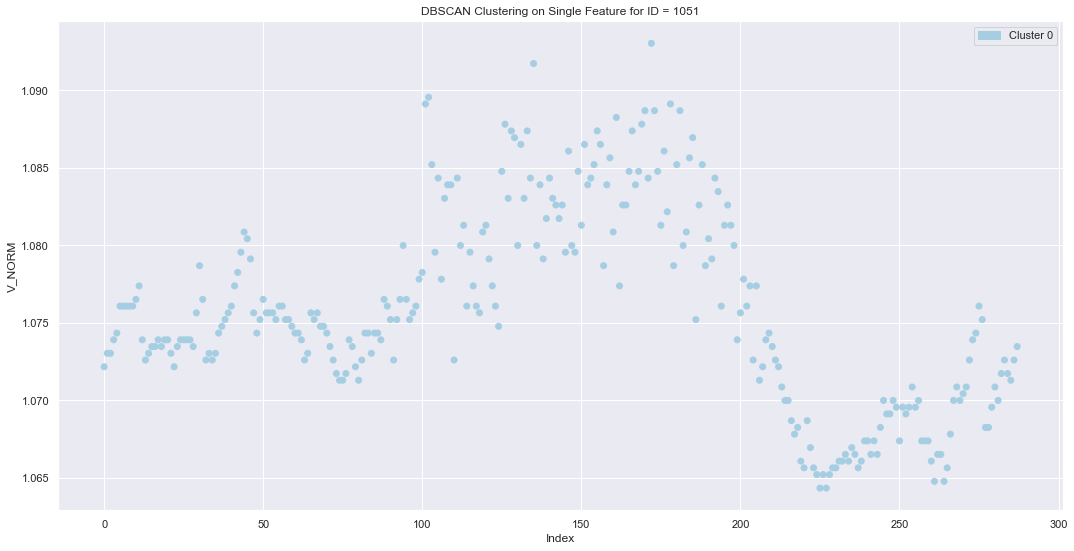

1062 =============================================================================


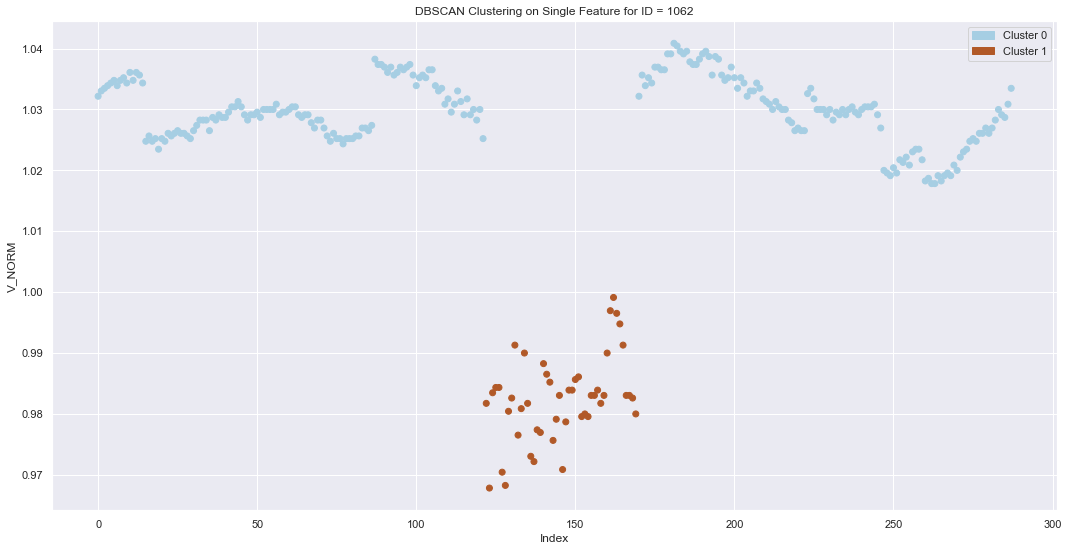

1077 =============================================================================


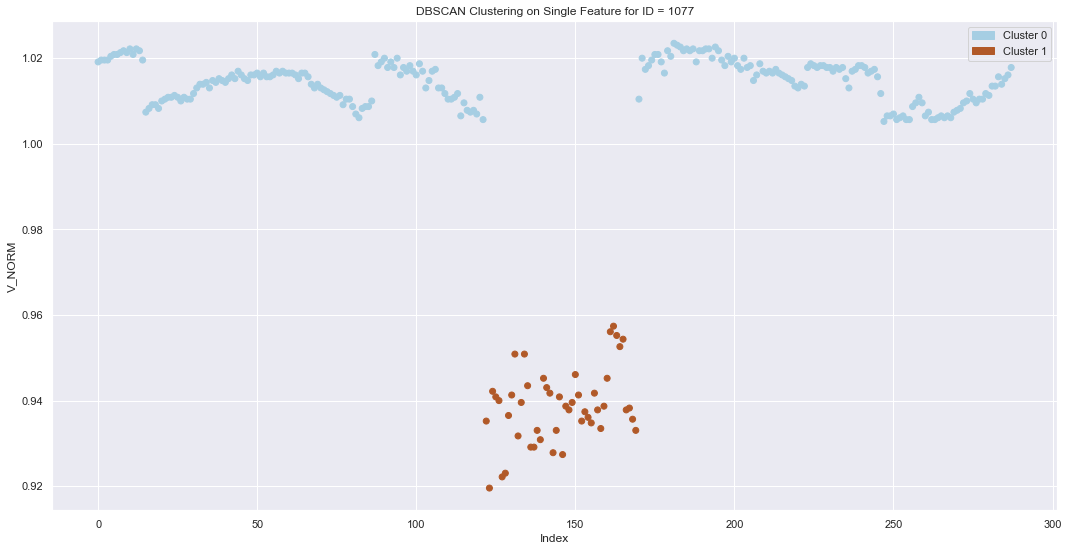

1083 =============================================================================


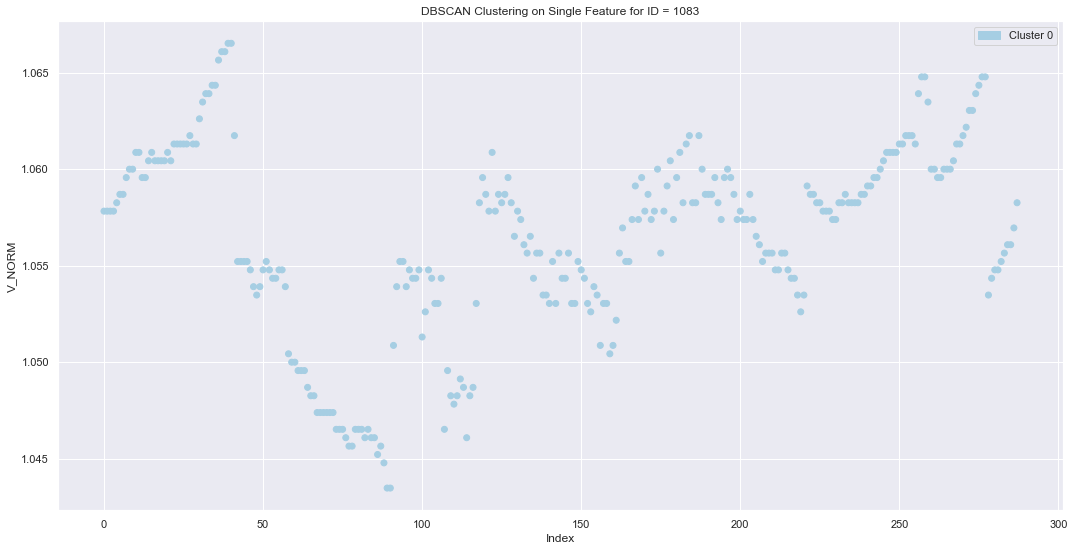

In [15]:
for idx in ids:
    print(idx, "=============================================================================")
    df_id = df[df['ID'] == idx].copy()
    df_id.reset_index(drop=True, inplace=True)
    
    # Standardizing the data
    X_scaled = StandardScaler().fit_transform(df_id[['V_NORM']])

    # Apply DBSCAN
    dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust these values as needed
    clusters = dbscan.fit_predict(X_scaled)

    # Plotting the results
    plt.figure(figsize=(18, 9))
    scatter = plt.scatter(df_id.index, df_id['V_NORM'], c=clusters, cmap='Paired')  # Color by cluster
    plt.xlabel('Index')
    plt.ylabel('V_NORM')
    plt.title(f'DBSCAN Clustering on Single Feature for ID = {idx}')

    # Create a legend
    unique_clusters = np.unique(clusters)
    colors = [scatter.cmap(s) for s in scatter.norm(unique_clusters)]
    patches = [mpatches.Patch(color=colors[i], label=f"Cluster {unique_clusters[i]}") for i in range(len(unique_clusters))]
    plt.legend(handles=patches)

    plt.show()